In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
from sqlalchemy import create_engine, inspect

In [5]:
engine  = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
inspector = inspect(engine)
# reflect the tables
inspector.get_table_names()

['measurement', 'station']

In [7]:
query = """
            SELECT
                s.id,
                s.station,
                s.name,
                s.elevation,
                m.date,
                m.prcp,
                m.tobs
            FROM
                measurement m
            JOIN station s ON s.station = m.station;
        """

In [8]:
conn = engine.connect()
df = pd.read_sql(query, conn)
conn.close()
df.head()

,id,station,name,elevation,date,prcp,tobs
0,1,USC00519397,"WAIKIKI 717.2, HI US",3.0,2010-01-01,0.08,65.0
1,1,USC00519397,"WAIKIKI 717.2, HI US",3.0,2010-01-02,0.00,63.0
2,1,USC00519397,"WAIKIKI 717.2, HI US",3.0,2010-01-03,0.00,74.0
3,1,USC00519397,"WAIKIKI 717.2, HI US",3.0,2010-01-04,0.00,76.0
4,1,USC00519397,"WAIKIKI 717.2, HI US",3.0,2010-01-06,NaN,73.0


In [9]:
prev_year = dt.date(2017,8,23) - dt.timedelta(days=365)

In [10]:
query2 = """
            SELECT
               date,
               prcp
            FROM
                measurement
            WHERE
                date > '2016-08-23'
        """

In [11]:
conn = engine.connect()
new_df = pd.read_sql(query2, conn).sort_values("date")
conn.close()
new_df.head()

,date,prcp
0,2016-08-24,0.08
1006,2016-08-24,NaN
1524,2016-08-24,2.15
702,2016-08-24,2.28
360,2016-08-24,2.15


In [12]:
new_df["date"] = pd.to_datetime(new_df.date)
new_df.head()

,date,prcp
0,2016-08-24,0.08
1006,2016-08-24,NaN
1524,2016-08-24,2.15
702,2016-08-24,2.28
360,2016-08-24,2.15


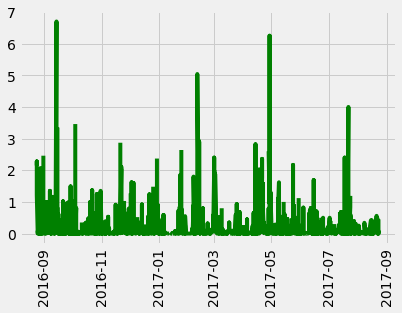

In [13]:
plt.plot(new_df.date, new_df.prcp, color="green")
plt.xticks(rotation=90)
plt.show()

In [14]:
query3 = """
            SELECT
                station,
                COUNT(station) as "most_active"
            FROM
                measurement
            Group by
                station
            ORDER BY 
                most_active DESC
            LIMIT
                1
        """

In [15]:
conn = engine.connect()
df3 = pd.read_sql(query3, conn)
conn.close()
df3.head()

,station,most_active
0,USC00519281,2772


In [26]:
query4 = """
            SELECT
                tobs
            FROM
                measurement
            WHERE 
                date BETWEEN '2016-08-23' AND '2017-08-23' and station = 'USC00519281'                
        """

In [27]:
conn = engine.connect()
data = pd.read_sql(query4, conn)
conn.close()
data.head()

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


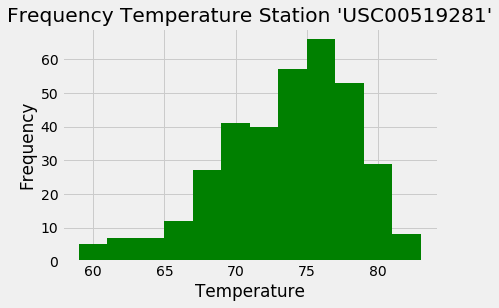

In [19]:
plt.hist(data.tobs, bins=12, color='green')
plt.title("Frequency Temperature Station 'USC00519281'")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

In [32]:
query5 = """
            SELECT
                date,
                prcp,
                tobs
            FROM
                measurement           
        """

In [34]:
conn = engine.connect()
df5 = pd.read_sql(query5, conn)
conn.close()
df5.head()

,date,prcp,tobs
0,2010-01-01,0.08,65.0
1,2010-01-02,0.00,63.0
2,2010-01-03,0.00,74.0
3,2010-01-04,0.00,76.0
4,2010-01-06,NaN,73.0


In [36]:
df5["Date"] = pd.to_datetime(df5.date)
df5 = df5[["Date", "prcp", "tobs"]]
df5["month_day"] = df5.Date.dt.strftime("%m-%d")
df5.head()

,Date,prcp,tobs,month_day
0,2010-01-01,0.08,65.0,01-01
1,2010-01-02,0.00,63.0,01-02
2,2010-01-03,0.00,74.0,01-03
3,2010-01-04,0.00,76.0,01-04
4,2010-01-06,NaN,73.0,01-06


In [39]:
start = "09-05"
mask = (df5["month_day"]== start)
df6 = df5.loc[mask]
df6.head()

,Date,prcp,tobs,month_day
225,2010-09-05,0.00,77.0,09-05
559,2011-09-05,0.00,77.0,09-05
919,2012-09-05,0.01,75.0,09-05
1283,2013-09-05,0.00,74.0,09-05
1648,2014-09-05,0.39,78.0,09-05


In [64]:
mmin = df6.tobs.min()
mmax = df6.tobs.max()
avg = df6.tobs.mean()

In [48]:
avg_error = mmax - mmin 
avg_error

18.0

Text(0, 0.5, 'Temperature')

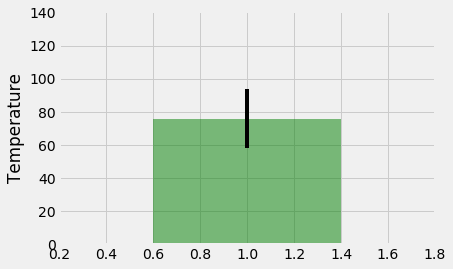

In [55]:
plt.bar(1, avg, yerr = avg_error, alpha = 0.5, color = "green")
plt. margins(.5,.5)
plt.ylabel("Temperature")

In [93]:
def getTemp(date, df):
    df5["month_day"] = df5.Date.dt.strftime("%m-%d")
    start = f"{date}"
    mask = (df["month_day"]== start)
    df6 = df5.loc[mask]
    
    return(mmin, mmax, avg)

In [94]:
getTemp("09-05", df5)

(66.0, 84.0, 75.91489361702128)

In [95]:
first_day = "2018-06-15"
last_day = "2018-06-22"

trip = pd.date_range(first_day, last_day, freq="D")
trip

DatetimeIndex(['2018-06-15', '2018-06-16', '2018-06-17', '2018-06-18',
               '2018-06-19', '2018-06-20', '2018-06-21', '2018-06-22'],
              dtype='datetime64[ns]', freq='D')

In [96]:
trip_month_day = trip.strftime("%m-%d")
trip_month_day

Index(['06-15', '06-16', '06-17', '06-18', '06-19', '06-20', '06-21', '06-22'], dtype='object')

In [97]:
week = []

for date in trip_month_day:
        week.append(getTemp(date, df5))

In [98]:
week

[(66.0, 84.0, 75.91489361702128),
 (66.0, 84.0, 75.91489361702128),
 (66.0, 84.0, 75.91489361702128),
 (66.0, 84.0, 75.91489361702128),
 (66.0, 84.0, 75.91489361702128),
 (66.0, 84.0, 75.91489361702128),
 (66.0, 84.0, 75.91489361702128),
 (66.0, 84.0, 75.91489361702128)]

In [99]:
df = pd.DataFrame(week, columns=["min_temp", "avg_temp", "max_temp"])
df["date"] = trip
df.set_index(["date"], inplace=True)
df.head()

,min_temp,avg_temp,max_temp
date,,,
2018-06-15,66.0,84.0,75.914894
2018-06-16,66.0,84.0,75.914894
2018-06-17,66.0,84.0,75.914894
2018-06-18,66.0,84.0,75.914894
2018-06-19,66.0,84.0,75.914894


Text(9.435000000000002, 0.5, 'Temperature')

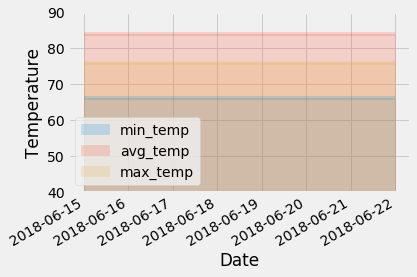

In [106]:
df.plot(kind="area", stacked = False, x_compat=True, alpha=.2)
plt.tight_layout()
plt.ylim([40, 90])
plt.xlabel("Date")
plt.ylabel("Temperature")

(array([736860., 736861., 736862., 736863., 736864., 736865., 736866.,
        736867.]),
 <a list of 8 Text xticklabel objects>)

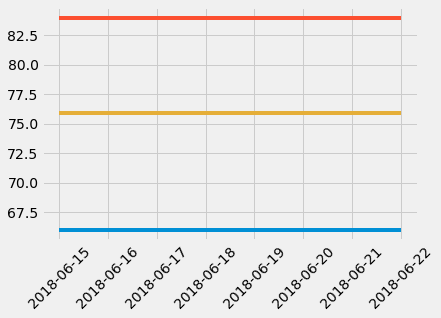

In [102]:
plt.plot(df)
plt.xticks(rotation = 45)